In [142]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as pl
#from numpy import line
import time
import tabulate


In [66]:
def aleatorio_uniforme(cantidad, semilla=3355):
    
    c=12345
    m=32768
    a=1103515245
    
    x=[]
    aux = semilla
    
    for i in range(cantidad):
        aux = (a*aux + c) % m
        x.append(aux/m)
        
    return np.array(x)-0.5
    
def aleatorio_gauss(cantidad, semilla=3355):
    
    x = []
    
    for i in range(cantidad):
        y = aleatorio_uniforme(10,semilla*i);
        y = sum(y)/len(y)
        #y = sum(y)
        x.append(y*10)
    
    return np.array(x)

def aleatorio_unimodal(cantidad, varianza, media):
    
    dev = np.sqrt(varianza)
    return aleatorio_gauss(cantidad,time.clock_gettime(time.CLOCK_MONOTONIC))*dev + media

    
def aleatorio_gauss_mdim(dim=[2,10]):
    
    x = []  
    
    for i in range(dim[0]):
        aux = aleatorio_gauss(dim[1],time.clock_gettime(time.CLOCK_MONOTONIC))
        x.append(aux)
        time.sleep(1)
    
    return np.array(x)

def aleatorio_multimodal_mdim(dim, covarianza, media):
    
    data = aleatorio_gauss_mdim(dim)
    
    data = (data.T @ np.sqrt(covarianza)).T + media
    
    #dev = np.sqrt(varianza)
    return data

#  Punto 1

# Caso Unidimensional

#### Generación de los valores aleatorios

In [67]:
un_x = aleatorio_gauss(200000)

In [68]:
print("Los primeros 4 números de los {} generados son:{}".format(len(un_x),un_x[0:4:1]))

Los primeros 4 números de los 200000 generados son:[-0.83511353  0.79751587  0.43014526  2.06277466]


In [69]:
print("La media de los valores generados es:{} y la desviación estándar:{}".format(un_x.mean(),un_x.std()))

La media de los valores generados es:-0.00017509765625 y la desviación estándar:0.9134408022758271


#### Histrograma normalizado de la variable anterior

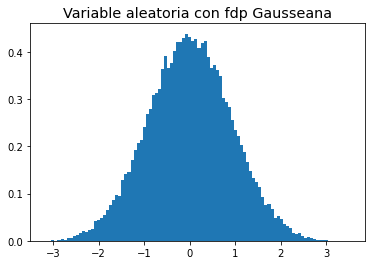

In [70]:
#fig, ax = pl.subplots(1, 1, sharey=False, tight_layout=True)

ax=pl.hist(un_x,bins=100,histtype = 'bar',density=True);
pl.title("Variable aleatoria con fdp Gausseana",size="x-large");


#### Comparativa contra la distribución teórica (usamos varianza=6 y media = -2.5)

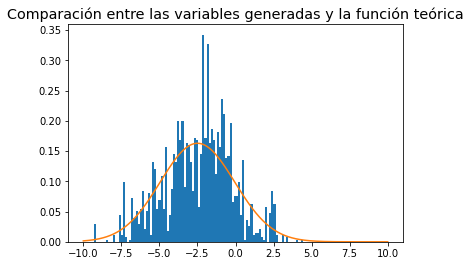

In [71]:

# Caracteristicas de la distribución
varianza = 6
media = -2.5

# Generamos los valores aleatorios
x = aleatorio_unimodal(2000, varianza, media)



##Función de densidad de probabilidad
n = np.linspace(-10,10,2000)
factor = 1/(np.sqrt(2*np.pi*varianza))
fdp = factor * np.exp(-((n-media)**2)/(2*varianza))

#fig, ax = pl.subplots(2, 1, sharex=True, tight_layout=True)

pl.hist(x,bins=100,histtype = 'bar',density=True,stacked=True);
pl.plot(n,fdp);

pl.title("Comparación entre las variables generadas y la función teórica",size="x-large");

## Caso Bidimensional no correlacionado

#### Generación de los valores aleatorios

In [85]:
dos_x = aleatorio_gauss_mdim([2,100])

print("Los primeros 4 números de los {} generados son:\n{}".format(len(dos_x),dos_x.T[0:4:1,0:2:1]))

Los primeros 4 números de los 2 generados son:
[[-0.83511353 -0.83511353]
 [ 0.31382751 -0.87774658]
 [ 0.46276855  0.07962036]
 [-0.40005493  0.06051636]]


In [86]:
print("Las medias de los valores generados son:{}\ny las desviaciones estándar:{}".format(dos_x.mean(axis=1),dos_x.std(axis=1)))

Las medias de los valores generados son:[-0.04676773  0.00948822]
y las desviaciones estándar:[0.95795434 0.76875032]


#### Grafica de los puntos de la variable anterior y sus histogramas normalizados

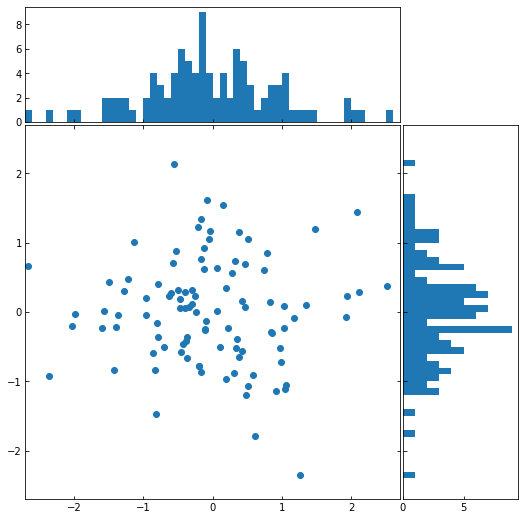

In [89]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(figsize=(8, 8))

ax_scatter = pl.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = pl.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = pl.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(dos_x[0], dos_x[1])
#ax_scatter.scatter(data2[0], data2[1])

# now determine nice limits by hand:
binwidth = 0.1
lim = np.ceil(np.abs([dos_x[0], dos_x[1]]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(dos_x[0], bins=bins) 
ax_histy.hist(dos_x[1], bins=bins, orientation='horizontal')

#ax_histx.hist(data2[0], bins=bins) 
#ax_histy.hist(data2[1], bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


pl.show()



#### Graficacon covarianza y media comparada con curvas teóricas

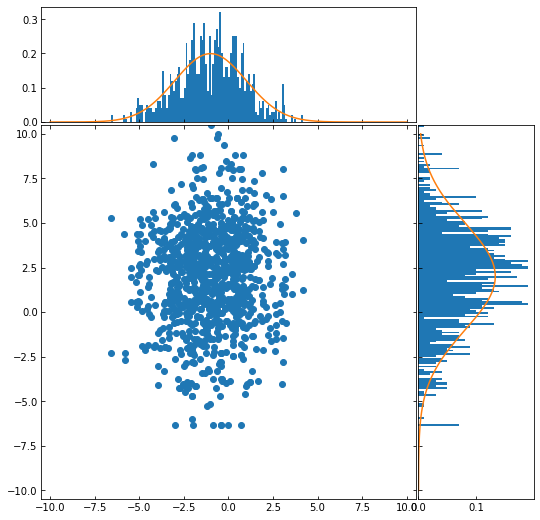

In [90]:
# Caracterisicas de la variable aleatoria
covarianza = np.array([[4,0],[0,9]])
media = [[-1],[2]]

# Generación de la variable
x = aleatorio_multimodal_mdim([2,1000], covarianza, media);

# Función teórica de densidad de probabilidad

n = np.array(np.linspace(-10,10,2000))


factor = 1/(np.sqrt(2*np.pi*covarianza[0,0]))
fdp_x = factor * np.exp(-((n-media[0])**2)/(2*covarianza[0,0]))

factor = 1/(np.sqrt(2*np.pi*covarianza[1,1]))
fdp_y = factor * np.exp(-((n-media[1])**2)/(2*covarianza[1,1]))


#(n-media).T @ np.linalg.inv(covarianza) @ (n-media)

## Graficación

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(figsize=(8, 8))

ax_scatter = pl.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = pl.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = pl.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x[0], x[1])
#ax_scatter.scatter(data2[0], data2[1])

# now determine nice limits by hand:
binwidth = 0.1
lim = np.ceil(np.abs([x[0], x[1]]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x[0], bins=bins,density=True)
ax_histx.plot(n,fdp_x)
ax_histy.hist(x[1], bins=bins, orientation='horizontal', density=True)
ax_histy.plot(fdp_y,n)
#ax_histx.hist(data2[0], bins=bins) 
#ax_histy.hist(data2[1], bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


pl.show()

## Caso bidimensional con variables correlacionadas

In [94]:
covarianza = np.array([[4,2],[2,9]])
media = np.array([[1],[2]])

tres_x = aleatorio_multimodal_mdim([2,1000], covarianza, media)


print("Los primeros 4 números de los {} generados son:\n{}".format(len(tres_x),tres_x.T[0:4:1,0:2:1]))

Los primeros 4 números de los 2 generados son:
[[-1.85125592 -1.68636945]
 [ 2.44948989  3.24344999]
 [-4.07819143 -3.48358483]
 [ 1.55643473  4.34237235]]


In [95]:
print("Las medias de los valores generados son:{}\ny las desviaciones estándar:{}".format(tres_x.mean(axis=1),tres_x.std(axis=1)))

Las medias de los valores generados son:[0.96257807 1.94426008]
y las desviaciones estándar:[2.32413991 3.15790199]


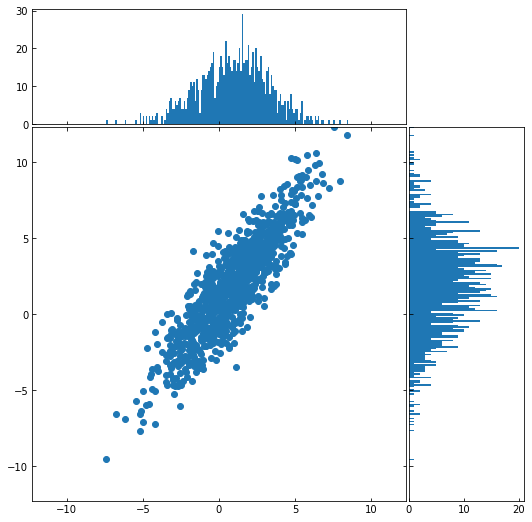

In [96]:
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(figsize=(8, 8))

ax_scatter = pl.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = pl.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = pl.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(tres_x[0], tres_x[1])
#ax_scatter.scatter(data2[0], data2[1])

# now determine nice limits by hand:
binwidth = 0.1
lim = np.ceil(np.abs([tres_x[0], tres_x[1]]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(tres_x[0], bins=bins) 
ax_histy.hist(tres_x[1], bins=bins, orientation='horizontal')

#ax_histx.hist(data2[0], bins=bins) 
#ax_histy.hist(data2[1], bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


pl.show()



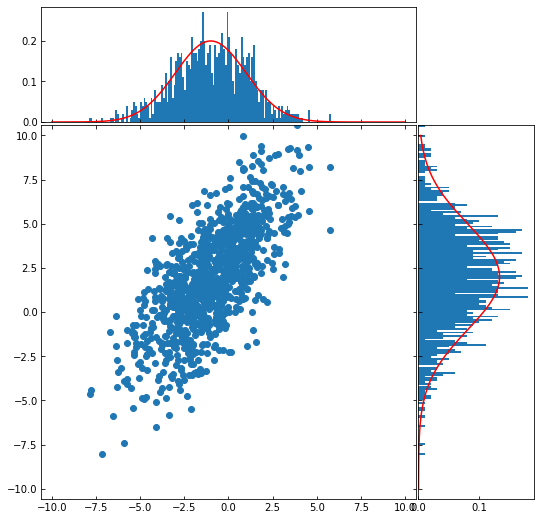

In [99]:
# Caracterisicas de la variable aleatoria
covarianza = np.array([[4,1],[1,9]])
media = [[-1],[2]]

# Generación de la variable
x = aleatorio_multimodal_mdim([2,1000], covarianza, media);

# Función teórica de densidad de probabilidad

n = np.array(np.linspace(-10,10,2000))


factor = 1/(np.sqrt(2*np.pi*covarianza[0,0]))
fdp_x = factor * np.exp(-((n-media[0])**2)/(2*covarianza[0,0]))

factor = 1/(np.sqrt(2*np.pi*covarianza[1,1]))
fdp_y = factor * np.exp(-((n-media[1])**2)/(2*covarianza[1,1]))


#(n-media).T @ np.linalg.inv(covarianza) @ (n-media)

## Graficación

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a rectangular Figure
pl.figure(figsize=(8, 8))

ax_scatter = pl.axes(rect_scatter)
ax_scatter.tick_params(direction='in', top=True, right=True)
ax_histx = pl.axes(rect_histx)
ax_histx.tick_params(direction='in', labelbottom=False)
ax_histy = pl.axes(rect_histy)
ax_histy.tick_params(direction='in', labelleft=False)

# the scatter plot:
ax_scatter.scatter(x[0], x[1])
#ax_scatter.scatter(data2[0], data2[1])

# now determine nice limits by hand:
binwidth = 0.1
lim = np.ceil(np.abs([x[0], x[1]]).max() / binwidth) * binwidth
ax_scatter.set_xlim((-lim, lim))
ax_scatter.set_ylim((-lim, lim))

bins = np.arange(-lim, lim + binwidth, binwidth)
ax_histx.hist(x[0], bins=bins,density=True)
ax_histx.plot(n,fdp_x,color='r')
ax_histy.hist(x[1], bins=bins, orientation='horizontal', density=True)
ax_histy.plot(fdp_y,n,color='r')
#ax_histx.hist(data2[0], bins=bins) 
#ax_histy.hist(data2[1], bins=bins, orientation='horizontal')

ax_histx.set_xlim(ax_scatter.get_xlim())
ax_histy.set_ylim(ax_scatter.get_ylim())


pl.show()

# Punto 2

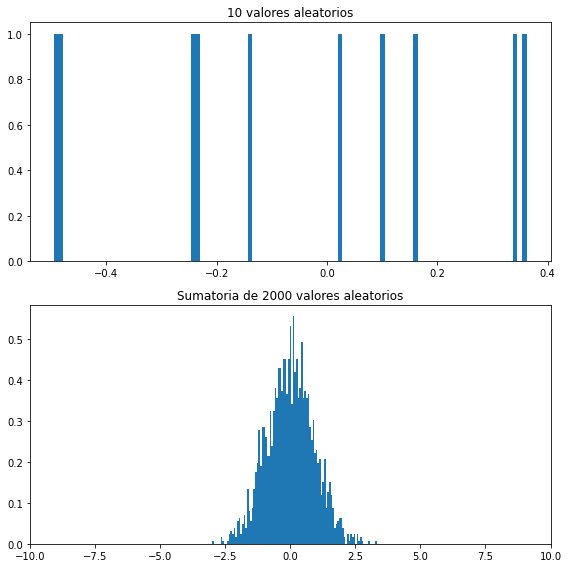

In [101]:
x = []
    
for i in range(2000):
    y = aleatorio_uniforme(10,time.clock_gettime(time.CLOCK_MONOTONIC))
    aux = sum(y)/len(y)
    x.append(aux*10)

fig, ax = pl.subplots(2, 1, sharey=False, tight_layout=True,figsize=[8,8])

ax[0].hist(y,bins=100,histtype = 'bar');
ax[0].set_title("10 valores aleatorios")
ax[1].hist(x,bins=100,histtype = 'bar',density=True);
ax[1].set_title("Sumatoria de 2000 valores aleatorios")

pl.xlim(-10,10);


# Punto 3

In [17]:
def aleatorio_laplace(cantidad, mu, b):
    x=[]
    for i in range(cantidad):
        aux = aleatorio_uniforme(10, time.clock_gettime(time.CLOCK_MONOTONIC))
        aux = sum(aux)/len(aux)
        #x.append(mu - b * np.sign((aux*10)*np.log(np.abs(1-2*aux*10))))
        x.append((mu - b * np.sign(aux)*np.log(1-2*np.abs(aux))))
    
    x = np.array(x)

    
    return x
    

In [18]:
x = aleatorio_laplace(20000,1,1)

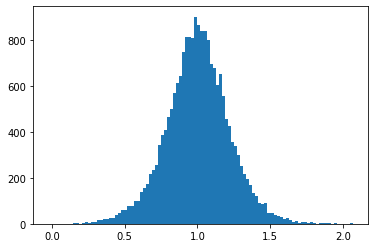

In [19]:
pl.hist(x,bins=100,density=False);

In [20]:
mu=0
b=5
cantidad = 10
x=[]
for i in range(cantidad):
    aux = aleatorio_uniforme(10, time.clock_gettime(time.CLOCK_MONOTONIC))
    aux = sum(aux)/len(aux)
    #print(np.log(1-2*np.abs(aux))*b)
    x.append((mu - b * np.sign(aux)*np.log(1-2*np.abs(aux)))*10)
x

[-8.010138439716828,
 -3.7722866357605307,
 11.300861138458139,
 10.485424148455804,
 -1.8140256078769876,
 -1.2922676731049612,
 -12.743305810881619,
 -0.8475227261750228,
 1.7436944125719198,
 11.356833990012074]

In [134]:
def entropia(fdp,paso):
    return -np.dot(fdp, np.log(fdp))*paso

def gaussiana(x):
    return (1/np.sqrt(2*np.pi))*np.exp(-(x)**2 /(2))

def laplaciana(x):
    b = np.sqrt(.5)
    return 1/(2*b) * np.exp(-np.abs(x)/b)

def uniforme(x):
    #return [1/np.sqrt(12) else 0.0001 for k in x if np.abs(k) < np.sqrt(12)/2 ]
    return [1/np.sqrt(12) if np.abs(k) < np.sqrt(12)/2 else 0.00001 for k in x]


In [135]:

paso = 0.001
x = np.arange(-4,4,paso)

gauss = gaussiana(x)
lap = laplaciana(x)
unif = uniforme(x)



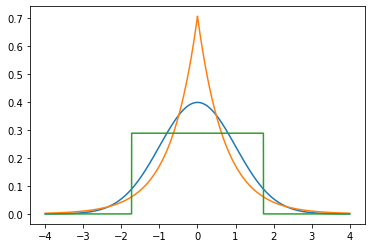

In [136]:
pl.plot(x,gauss)
pl.plot(x,lap)
pl.plot(x,unif)

In [150]:
table = [["Distribución", "Entropía numérica", "Entropía teórica"],
         ["Gaussiana", entropia(gauss,paso), np.log(2*np.pi*np.e)/2],
         ["Uniforme", entropia(unif,paso), np.log(np.sqrt(12))],
         ["Laplaciana", entropia(lap,paso), np.log(2*np.e/np.sqrt(2))]]

print(tabulate.tabulate(table))

------------  ------------------  ------------------
Distribución  Entropía numérica   Entropía teórica
Gaussiana     1.4183133325043769  1.4189385332046727
Uniforme      1.2432976556125608  1.2424533248940002
Laplaciana    1.3221070784044715  1.3465735902799725
------------  ------------------  ------------------


In [138]:
np.log(1)

0.0